## Figure 1: Human Group Results

This notebook presents group-level analyses of place cell properties in human subjects. It includes:
- Percentage of place cells identified by different statistical methods
- Comparison of place cell detection across brain regions
- The relationship between detection metric and significance classification


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from convnwb.io import get_files, load_jsons_to_df
from scipy.stats import binom_test
from spiketools.plts.data import plot_hist
from spiketools.plts.annotate import add_vlines
from spiketools.plts.utils import make_grid, get_grid_subplot, save_figure
from spiketools.plts.style import drop_spines
from spiketools.utils.run import create_methods_list

In [3]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [4]:
import sys
sys.path.append('../code')
from reports import get_significant_percentage,get_agreement_percentage
from plts import plot_percentages

sys.path.append('../scripts')
from settings import PATHS, METHODS

## Load Group Data

In [5]:
results_folder = PATHS['RESULTS'] / 'units_bins_w_surr'
reports_folder = PATHS['REPORTS'] / 'units_bins_w_surr'

locations_folder = PATHS['BASE'] / 'localization'/'Loc'
jacksheet_folder = PATHS['BASE'] / 'localization'/'jacksheet'
locations_files = get_files(locations_folder, select='session_data')
locations_files

['session_data.json']

In [6]:
Locations = load_jsons_to_df(locations_files, folder=locations_folder)


In [7]:
results_folder

PosixPath('/Users/weijiazhang/Data/Train/results/units_bins_w_surr')

In [8]:
res_files = get_files(results_folder,select='json')

In [9]:
all_results = load_jsons_to_df(res_files, folder=results_folder)
all_results.columns

Index(['unit_ind', 'session_id', 'numBins', 'place_bins_20',
       'trial_place_bins_20', 'place_info_20', 'place_anova_20',
       'place_anova_surr_p_val_20', 'place_anova_surr_z_score20',
       'place_info_surr_p_val_20', 'place_info_surr_z_score20',
       'place_bins_30', 'trial_place_bins_30', 'place_info_30',
       'place_anova_30', 'place_anova_surr_p_val_30',
       'place_anova_surr_z_score30', 'place_info_surr_p_val_30',
       'place_info_surr_z_score30', 'place_bins_40', 'trial_place_bins_40',
       'place_info_40', 'place_anova_40', 'place_anova_surr_p_val_40',
       'place_anova_surr_z_score40', 'place_info_surr_p_val_40',
       'place_info_surr_z_score40', 'place_bins_50', 'trial_place_bins_50',
       'place_info_50', 'place_anova_50', 'place_anova_surr_p_val_50',
       'place_anova_surr_z_score50', 'place_info_surr_p_val_50',
       'place_info_surr_z_score50', 'place_bins_60', 'trial_place_bins_60',
       'place_info_60', 'place_anova_60', 'place_anova_surr_p

In [10]:

all_results['firing_rate'] = all_results['place_bins_40'].apply(lambda x: np.mean(x))
all_results['presence_ratio'] = all_results['trial_place_bins_40'].apply(lambda x: np.mean([np.any(np.array(trial) > 0) for trial in x]))

all_results = all_results[all_results['firing_rate'].astype(float) < 20]
all_results = all_results[all_results['firing_rate'].astype(float) > .15]
all_results = all_results[all_results['presence_ratio'].astype(float) > .2]

#all_results = all_results[all_results['presence_ratio'].astype(float) > .2]
# Display the filtered dataframe
print("\nFiltered dataframe shape:", all_results.shape)


Filtered dataframe shape: (306, 45)


In [11]:
PLACE_METHODS = {'PLACE':['ANOVA','INFO']}

In [12]:
all_results

,unit_ind,session_id,numBins,place_bins_20,trial_place_bins_20,place_info_20,place_anova_20,place_anova_surr_p_val_20,place_anova_surr_z_score20,place_info_surr_p_val_20,...,place_bins_60,trial_place_bins_60,place_info_60,place_anova_60,place_anova_surr_p_val_60,place_anova_surr_z_score60,place_info_surr_p_val_60,place_info_surr_z_score60,firing_rate,presence_ratio
0,0,EU001_0_train_events.mat,60,"[11.06720345787683, 11.308308445027194, 10.850...","[[15.555555555555557, 10.0, 10.0, 25.0, 10.0, ...",0.001267,0.648610,0.803,-0.854196,0.836,...,"[11.15441242784993, 11.682291666666664, 10.643...","[[18.0, 15.0, 10.0, 10.0, 15.0, 0.0, 20.0, 10....",0.004935,0.866592,0.693,-0.576339,0.805,-0.871764,10.884508,1.000000
1,1,EU001_0_train_events.mat,60,"[0.5222072785262123, 0.8379329004329005, 0.426...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0,...",0.022366,0.597474,0.891,-1.167961,0.843,...,"[0.4980215097402597, 0.2265625, 0.9375, 1.4114...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.082664,0.736826,0.919,-1.402592,0.912,-1.339061,0.697106,0.984375
2,2,EU001_0_train_events.mat,60,"[1.1894666959609876, 1.0796989468864469, 1.495...","[[0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 0.0, 0.0, 3.33...",0.012597,0.748897,0.716,-0.632636,0.775,...,"[1.1709674873737375, 1.4947916666666667, 1.049...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.047035,0.821668,0.808,-0.887158,0.878,-1.121734,1.317807,1.000000
3,3,EU001_0_train_events.mat,60,"[0.2792182662538699, 0.5355711996336997, 0.541...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.143699,0.985606,0.445,-0.017460,0.574,...,"[0.17708333333333334, 0.328125, 0.515625, 0.57...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.515763,1.331937,0.051,1.743820,0.489,-0.006427,0.459250,0.765625
4,4,EU001_0_train_events.mat,60,"[6.711602998609578, 6.77004614309302, 6.246971...","[[4.444444444444445, 7.5, 0.0, 0.0, 12.5, 5.0,...",0.019324,2.290358,0.006,3.340656,0.015,...,"[6.136848394660893, 7.494791666666667, 7.30468...","[[0.0, 15.0, 5.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0....",0.048140,1.593135,0.004,3.050315,0.007,2.551391,6.248726,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2,R1391T_0_train_events.mat,60,"[1.3161617028804529, 1.3235677083333335, 2.058...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.043400,0.692081,0.693,-0.557050,0.715,...,"[1.607142857142857, 1.0677083333333333, 0.7812...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.066173,0.883373,0.442,-0.077963,0.558,-0.342184,1.645169,0.796875
383,4,R1391T_0_train_events.mat,60,"[4.102406882387049, 5.300292512838468, 5.12659...","[[0.0, 8.88888888888889, 2.0000000000000004, 8...",0.039800,1.642552,0.067,1.716702,0.079,...,"[3.7005828373015874, 4.479166666666667, 4.8697...","[[0.0, 0.0, 0.0, 6.666666666666666, 9.99999999...",0.044165,1.436517,0.083,1.500182,0.113,1.224618,3.459233,0.984375
384,5,R1391T_0_train_events.mat,60,"[2.3284110191279312, 2.473398473972923, 1.7961...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.444444444444...",0.013813,0.400614,0.941,-1.277082,0.946,...,"[2.153459821428571, 2.5130208333333335, 2.7213...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.020723,0.465196,0.940,-1.301675,0.938,-1.353321,2.410150,0.937500
385,6,R1391T_0_train_events.mat,60,"[0.9001783806471306, 0.45703125, 0.38194444444...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.150466,0.900795,0.498,-0.122158,0.617,...,"[0.8082217261904762, 1.09375, 0.96354166666666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.212549,0.987874,0.392,0.138102,0.594,-0.335542,0.630090,0.515625


In [13]:
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))

# Collect numbers of significant cells
analyses = create_methods_list(PLACE_METHODS)

# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'   
results = {}

# Check significance for 20, 30, 40, 50, 60 bins
bin_sizes = [20,30, 40,50, 60]
for bin_size in bin_sizes:
    for analysis in analyses:
        # Create column indicating if unit is significant for this bin size
        all_results[f'is_{analysis}_{bin_size}'] = (all_results[f'{analysis}_surr_p_val_{bin_size}'] < alpha_level).values
        
        # Count number of significant units
        results[f'{analysis}_{bin_size}'] = sum(all_results[f'is_{analysis}_{bin_size}'])

# Compute significance of the counts of detected neurons
stats = {}
for bin_size in bin_sizes:
    for analysis in analyses:
        stats[f'{analysis}_{bin_size}'] = binom_test(results[f'{analysis}_{bin_size}'], n_units, alpha_level, binom_sidedness)

print('total cells: {}\n'.format( n_units))

stats_pct = {}
for bin_size in bin_sizes:  
    for analysis in analyses:
        stats_pct[f'{analysis}_{bin_size}'] = results[f'{analysis}_{bin_size}'] / n_units * 100
        print('# {} cells ({} bins):     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
            analysis, bin_size, results[f'{analysis}_{bin_size}'], results[f'{analysis}_{bin_size}'] / n_units * 100, stats[f'{analysis}_{bin_size}']))

Total number of cells: 306
total cells: 306

# place_anova cells (20 bins):     		 43  (14.05%) 		 0.0000
# place_info cells (20 bins):     		 48  (15.69%) 		 0.0000
# place_anova cells (30 bins):     		 45  (14.71%) 		 0.0000
# place_info cells (30 bins):     		 52  (16.99%) 		 0.0000
# place_anova cells (40 bins):     		 44  (14.38%) 		 0.0000
# place_info cells (40 bins):     		 46  (15.03%) 		 0.0000
# place_anova cells (50 bins):     		 45  (14.71%) 		 0.0000
# place_info cells (50 bins):     		 47  (15.36%) 		 0.0000
# place_anova cells (60 bins):     		 41  (13.40%) 		 0.0000
# place_info cells (60 bins):     		 43  (14.05%) 		 0.0000


/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_29786/2423307600.py:26: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats[f'{analysis}_{bin_size}'] = binom_test(results[f'{analysis}_{bin_size}'], n_units, alpha_level, binom_sidedness)


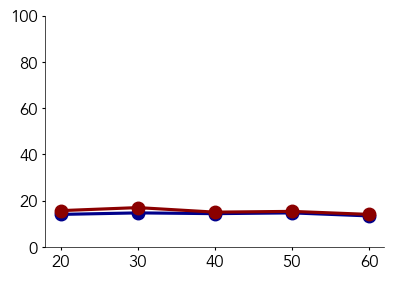

In [19]:
# Plot percentage of significant cells vs bin size for place ANOVA
bin_sizes = [20, 30, 40, 50, 60]
place_anova_pcts = [stats_pct[f'place_anova_{bin_size}'] for bin_size in bin_sizes]
place_info_pcts = [stats_pct[f'place_info_{bin_size}'] for bin_size in bin_sizes]

grid = make_grid(2, 4, wspace=.8
                 , hspace=1, figsize=(10, 3),
                 )

plt.rcParams.update({
    'font.family': 'Avenir',  # Other options similar to Apple SD Gothic Neo: 'Avenir', 'Helvetica Neue', 'SF Pro Text'
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'legend.fontsize': 6,
    'xtick.labelsize': 12,  # Smaller tick label size
    'ytick.labelsize': 12,  # Smaller tick label size
    'axes.linewidth': 0.5,  # Reduce the thickness of axis lines

    'xtick.major.width': 0.8,  # Thinner x ticks
    'ytick.major.width': 0.8,  # Thinner y ticks
    'xtick.major.size': 2.0,   # Shorter x ticks
    'ytick.major.size': 2.0

})

ax = get_grid_subplot(grid,slice(0,2),  slice(0,2))
ax.plot(bin_sizes, place_anova_pcts, 'o-', color='darkblue')
ax.plot(bin_sizes, place_info_pcts, 'o-', color='darkred')
# ax.set_xlabel('Number of Bins')
# ax.set_ylabel('Significant units (%)')
ax.set_ylim(0, 100)

drop_spines(['top', 'right'], ax=ax)


#ax.legend(['ANOVA', 'S I'], loc='upper right', fontsize='xx-small')
save_figure('Effect_of_Bin_Size_Significant.pdf',file_path='/Users/weijiazhang/Plots/PLDM/Human')


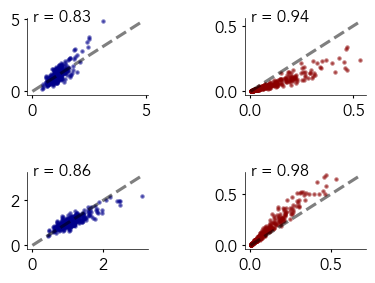

In [23]:
# Create scatter plot comparing ANOVA F-statistics between 20 and 40 bins
grid = make_grid(2, 4, wspace=.8
                 , hspace=1, figsize=(10, 3),
                 )

plt.rcParams.update({
    'font.family': 'Avenir',  # Other options similar to Apple SD Gothic Neo: 'Avenir', 'Helvetica Neue', 'SF Pro Text'
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'legend.fontsize': 6,
    'xtick.labelsize': 12,  # Smaller tick label size
    'ytick.labelsize': 12,  # Smaller tick label size
    'axes.linewidth': 0.5,  # Reduce the thickness of axis lines

    'xtick.major.width': 0.8,  # Thinner x ticks
    'ytick.major.width': 0.8,  # Thinner y ticks
    'xtick.major.size': 2.0,   # Shorter x ticks
    'ytick.major.size': 2.0

})

ax = get_grid_subplot(grid, 0, 0)
ax.scatter(all_results['place_anova_40'], all_results['place_anova_20'], alpha=0.5,color='darkblue',s=3)
ax.plot([0, max(all_results['place_anova_40'].max(), all_results['place_anova_20'].max())], 
         [0, max(all_results['place_anova_40'].max(), all_results['place_anova_20'].max())], 
         'k--', alpha=0.5) # Add diagonal line

# ax.set_xlabel('ANOVA F-statistic (40 bins)')
# ax.set_ylabel('ANOVA F-statistic (20 bins)') 

# ax.set_title('40 vs 20 bins')

# Calculate correlation coefficient
corr = all_results['place_anova_40'].corr(all_results['place_anova_20'])
ax.text(0.05, 0.95, f'r = {corr:.2f}', 
         transform=ax.transAxes, 
         )
drop_spines(['top', 'right'], ax=ax)

ax = get_grid_subplot(grid, 1, 0)
ax.scatter(all_results['place_anova_40'], all_results['place_anova_60'], alpha=0.5,color='darkblue',s=3)
ax.plot([0, max(all_results['place_anova_40'].max(), all_results['place_anova_60'].max())], 
         [0, max(all_results['place_anova_40'].max(), all_results['place_anova_60'].max())], 
         'k--', alpha=0.5) # Add diagonal line

# ax.set_xlabel('ANOVA F-statistic (40 bins)')
# ax.set_ylabel('ANOVA F-statistic (60 bins)') 
# ax.set_title('40 vs 60 bins')
corr = all_results['place_anova_40'].corr(all_results['place_anova_60'])
ax.text(0.05, 0.95, f'r = {corr:.2f}', 
         transform=ax.transAxes, 
         )
drop_spines(['top', 'right'], ax=ax)


ax = get_grid_subplot(grid,0,1)
ax.scatter(all_results['place_info_40'], all_results['place_info_20'], alpha=0.5,color='darkred',s=3)
ax.plot([0, max(all_results['place_info_40'].max(), all_results['place_info_20'].max())], 
         [0, max(all_results['place_info_40'].max(), all_results['place_info_20'].max())], 
         'k--', alpha=0.5) # Add diagonal line

# ax.set_xlabel('Spatial Information (40 bins)')
# ax.set_ylabel('Spatial Information (20 bins)') 
# ax.set_title('40 vs 20 bins')
drop_spines(['top', 'right'], ax=ax)
corr = all_results['place_info_40'].corr(all_results['place_info_20'])
ax.text(0.05, 0.95, f'r = {corr:.2f}', 
         transform=ax.transAxes, 
         )

ax = get_grid_subplot(grid,1,1)
ax.scatter(all_results['place_info_40'], all_results['place_info_60'], alpha=0.5,color='darkred',s=3)
ax.plot([0, max(all_results['place_info_40'].max(), all_results['place_info_60'].max())], 
         [0, max(all_results['place_info_40'].max(), all_results['place_info_60'].max())], 
         'k--', alpha=0.5) # Add diagonal line

# ax.set_xlabel('Spatial Information (40 bins)')
# ax.set_ylabel('Spatial Information (60 bins)') 
# ax.set_title('40 vs 60 bins')
drop_spines(['top', 'right'], ax=ax)
corr = all_results['place_info_40'].corr(all_results['place_info_60'])
ax.text(0.05, 0.95, f'r = {corr:.2f}', 
         transform=ax.transAxes, 
        )

save_figure('Effect_of_Bin_Size_Scatter',file_path='/Users/weijiazhang/Plots/PLDM/Human',dpi=300)


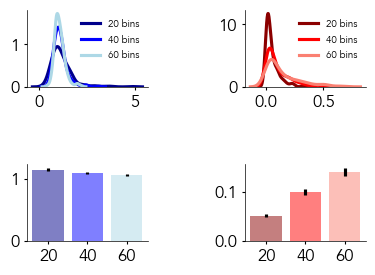

In [30]:

grid = make_grid(2, 4, wspace=.8
                 , hspace=1, figsize=(10, 3),
                 )

plt.rcParams.update({
    'font.family': 'Avenir',  # Other options similar to Apple SD Gothic Neo: 'Avenir', 'Helvetica Neue', 'SF Pro Text'
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'legend.fontsize': 7,
    'xtick.labelsize': 12,  # Smaller tick label size
    'ytick.labelsize': 12,  # Smaller tick label size
    'axes.linewidth': 0.5,  # Reduce the thickness of axis lines

    'xtick.major.width': 0.8,  # Thinner x ticks
    'ytick.major.width': 0.8,  # Thinner y ticks
    'xtick.major.size': 2.0,   # Shorter x ticks
    'ytick.major.size': 2.0

})

# Plot ANOVA F-statistic density
ax = get_grid_subplot(grid, 0, 0)
sns.kdeplot(data=all_results['place_anova_20'], ax=ax, color='darkblue', label='20 bins')
sns.kdeplot(data=all_results['place_anova_40'], ax=ax, color='blue', label='40 bins')
sns.kdeplot(data=all_results['place_anova_60'], ax=ax, color='lightblue', label='60 bins')
ax.set_ylabel('')
ax.set_xlabel('')
# ax.set_xlabel('ANOVA F-statistic')
# ax.set_ylabel('Density')
# ax.set_title('Distribution of F-statistics')
ax.legend(frameon=False)
drop_spines(['top', 'right'], ax=ax)

# Plot spatial information density
ax = get_grid_subplot(grid, 0, 1)
sns.kdeplot(data=all_results['place_info_20'], ax=ax, color='darkred', label='20 bins')
sns.kdeplot(data=all_results['place_info_40'], ax=ax, color='red', label='40 bins')
sns.kdeplot(data=all_results['place_info_60'], ax=ax, color='salmon', label='60 bins')
ax.set_ylabel('')
ax.set_xlabel('')
# ax.set_xlabel('Spatial Information')
# ax.set_ylabel('Density')
# ax.set_title('Distribution of Spatial Information')
ax.legend(frameon=False)
drop_spines(['top', 'right'], ax=ax)
# Add summary statistics
ax = get_grid_subplot(grid, 1, 0)
means = [all_results['place_anova_20'].mean(), all_results['place_anova_40'].mean(), all_results['place_anova_60'].mean()]
sems = [all_results['place_anova_20'].std()/np.sqrt(len(all_results)), 
        all_results['place_anova_40'].std()/np.sqrt(len(all_results)),
        all_results['place_anova_60'].std()/np.sqrt(len(all_results))]
ax.bar(['20', '40', '60'], means, yerr=sems, alpha=0.5, color=['darkblue', 'blue', 'lightblue'])
# ax.set_ylabel('Mean F-statistic')
# ax.set_title('ANOVA F-statistic')
drop_spines(['top', 'right'], ax=ax)

ax = get_grid_subplot(grid, 1, 1)
means = [all_results['place_info_20'].mean(), all_results['place_info_40'].mean(), all_results['place_info_60'].mean()]
sems = [all_results['place_info_20'].std()/np.sqrt(len(all_results)),
        all_results['place_info_40'].std()/np.sqrt(len(all_results)), 
        all_results['place_info_60'].std()/np.sqrt(len(all_results))]
ax.bar(['20', '40', '60'], means, yerr=sems, alpha=0.5, color=['darkred', 'red', 'salmon'])
# ax.set_ylabel('Mean Spatial Information')
# ax.set_title('Spatial Information')
drop_spines(['top', 'right'], ax=ax)


save_figure('Effect_of_Bin_Size_Distribution.pdf',file_path='/Users/weijiazhang/Plots/PLDM/Human')